<div id="container" style="position:relative;">
<div style="float:left"><h1> Stats and Politics 3 </h1></div>
<div style="position:relative; float:right"><img style="height:65px" src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />

### Prepared by: Eduardo Melo

### Summary
___


#### 1.  Linear regression for 2008
Fit a linear regression model that predicts the 2008 relative vote share of the Republican party within a county using the county-level demographic data. (You can fit your model on the entire data set.) When building your model, answer the following questions: 
- a) What are the data points? What are the independent and dependent variables you’ve chosen? 

- b) How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.


#### 2.  Logistics regression for 2008
Fit a logistic regression model using the same demographic data to predict which political party will take the majority of a county’s votes. (Please use the statsmodels package to create your logistic regression model here, not scikit-learn.) When building your model, answer the following questions: 
- a) How good is the fit of your model? 

- b) What metric is a good measure to evaluate your model here? Interpret your results.


#### 3. Creating new models (Pick one of the previous or a new one) 2012 and 2016 are train and 2008 is test maybe use normalization
Now build new models to predict the 2012 and 2016 relative vote share of the Republican party, respectively. 
- a) How does each of their performances compare to your 2008 model from question 1.1?



### 0.Preliminary steps - Importing libraries and files

In [1]:
import numpy as np
import pandas as pd
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn import linear_model

from sklearn.datasets import make_blobs
import statsmodels.api as sm

from matplotlib import cm

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('data/data_clean.csv')
votes = pd.read_csv('data/votes_clean.csv')

In [3]:
data_votes = pd.merge(data, votes, on='Fips')

### 1.  Linear regression for 2008
Fit a linear regression model that predicts the 2008 relative vote share of the Republican party within a county using the county-level demographic data. (You can fit your model on the entire data set.) When building your model, answer the following questions: 
- a) What are the data points? What are the independent and dependent variables you’ve chosen? 

- b) How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.0. Preliminary steps (importing libraries)

**Approach:** 
- Since the census data was incomplete (only one census result), the data was replicated three times, to be used as part of the linear regression.
- The Republicans 08 pct, Republicans 12 pct and Republicans 16 pct were split into different dataframes, to allow their separate use during questions 1,2 and 3.
- "Precincts", "ST", "County", "Fips" got dropped as using them would require create dummy variables and increase the number of columns considerably.
- Each election year vote share got separated and renamed to be used independently for the linear and later on for the logistic regressions.
- We used the train_test_data analysis, separating 2 of the election years as train data and the last as test data, according to the specific question's request. For instance, on Question 1, we selected 2012 and 2016 to be our train data and 2008 to be our test data.
- Prepared QQ plot to visualize any abnormality in the data distribution.
- Calculated both the train and test R-square to identify possible overfittings on the data and a requirement for  normalization.


**Results:**

#### a) What are the data points? 

 - From **data.csv** all columns, besides ST, Precincts, County.

 - From **votes.csv** only the columns Republicans 08 pct, Republicans 12 pct, Republicans 16 pct.
     -Republicans 12 pct and Republicans 16 pct used as train data and Republicans 08 pct as test data.


- What are the independent and dependent variables you’ve chosen? 

    - Dependent: Republicans 08 pct (test data), Republican 12 pct(train data) and Republicans 16 pct (train data).

    - Independent: all columns from data.csv , besides ST, Precincts, County.

#### b) How good is the fit of your model? What metric is a good measure to evaluate your model here? Interpret your results.

**R-square:**
The model adjusted reached a R-square of 0.796 for the train data, a fair result. 

**Prob(F-stat):**
Besides the R-square other good metrics are the Prob(F-Stat), conceptually similar to the p-value regarding its interpretation, low values indicate a strong data (<0.05). In this case, we got 0.00. 

**Residuals:**
Additionally, it is always nice to evaluate the residuals distribution, we would like those to be normally distributed, for that we prepared a set of plots with each of the x variables and their residuals(excluding the dummy variables), related to y. 
Some of the variables indicate to have outliers, these can surely compromise the goodness of fit for our model. But since this exercise is focused on interpreting the results, we could say that if we were to improve the R-square, some of the data points would have to be dropped.


Good Metrics:

- **Fprob:** Determines the significance of our results, the lowest it is, the stronger the model is. Ideally lower than 0.05.

- **R-Square:** Measures how well the model fits the data. The closer from it is, the better is your model. Strong models will have R2 higher than 0.9

- **Coefficient:** Low values for coefficients tend to have a low impact on the end result. Unless, the variable for that specific coefficient has very big numbers, for example, votes. An alternative approach to allow comparison between X variables would be to run a feature scaling on those variables, so that their coefficients could be easily compared.

- **QQ-Plot:** Not a direct metric to the fit, but help check if the data has a normal distribution,  an important assumption for linear regressions.


In [4]:
#Creating 3 dataframes for X and 3 dataframes for Y variables
#1st dataframe for X variables, to be used in association with y1
set1=data
#1st dataframe for the y variable, this one regarding 2012, column name was changed
y1=votes['Republicans 12 pct']
y1.rename(columns={'Republicans 12 pct':'vote_share'})
set1=set1.drop(["Precincts", "ST", "County", "Fips"], axis=1)

#2nd dataframe for X variables, to be used in association with y2
set2=data
set2=set2.drop(["Precincts", "ST", "County", "Fips"], axis=1)

#2nd dataframe for the y variable, this one regarding 2016, column name was changed
y2=votes['Republicans 16 pct']
y2.rename(columns={'Republicans 16 pct':'vote_share'})

#3rd dataframe for X variables, to be used in association with y3
set3=data
set3=set3.drop(["Precincts", "ST", "County", "Fips"], axis=1)

#3rd dataframe for the y variable, this one regarding 2008, column name was changed
y3=votes['Republicans 08 pct']
y3.rename(columns={'Republicans 08 pct':'vote_share'})

0       59.770827
1       64.944408
2       66.928730
3       38.279057
4       68.112558
5       36.698978
6       34.130977
7       74.630933
8       67.174393
9       66.661240
10      13.962703
11      53.884462
12      45.322458
13      39.462994
14      50.667522
15      44.020692
16      41.707837
17      52.578781
18      42.037828
19      80.608225
20      63.606449
21      47.554913
22      55.712607
23      65.903801
24      55.884311
25      49.102598
26      67.338323
27      54.989960
28      36.282548
29      54.966411
          ...    
3079    48.312936
3080    40.633947
3081    51.316902
3082    55.446674
3083    47.174949
3084    53.592920
3085    41.323110
3086    57.913363
3087    75.503538
3088    81.192498
3089    77.275976
3090    74.311111
3091    72.266325
3092    76.221336
3093    36.649682
3094    61.948109
3095    54.225217
3096    42.127480
3097    86.084142
3098    59.967995
3099    79.051383
3100    76.190476
3101    43.839310
3102    45.917210
3103    45

In [5]:
#Concatenating dataframes in order to run the train_test_split
X=pd.concat([set1,set2, set3])
y=pd.concat([y1,y2,y3])

# Create dummy variables for our X matrix

X = pd.get_dummies(X)


# Run the train_test_split on our X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, 
                                                    random_state=12, shuffle=False)

# Look at the shapes of the outputs
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6218, 91)
(6218,)
(3109, 91)
(3109,)


In [6]:
from statsmodels.regression import linear_model
import statsmodels.api as sm


# Define our regression, fit our model
my_reg = sm.OLS(y_train, X_train).fit()

# Look at the summary
my_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     274.3
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:55:13   Log-Likelihood:                -21006.
No. Observations:                6218   AIC:                         4.219e+04
Df Residuals:                    6128   BIC:                         4.280e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Votes                                                      -1.717e-05   4.16e-06     -4.127      0.000   -2.53e-05   -9.01e-06
Less Than High School Diploma                                  0.2621      0.067      3.910      0.000       0.131       0.393
At Least High School Diploma                                   0.1811      0.062      2.920      0.004       0.060       0.303
At Least Bachelors's Degree                                   -0.3028      0.047     -6.495      0.000      -0.394      -0.211
Graduate Degree                                               -0.8793      0.083    -10.555      0.000      -1.043      -0.716
School Enrollment                                              0.0420      0.024      1.747      0.081      -0.005       0.089
Median Earnings 2010                                          -0.0001   4.05e-05     -3.269      0.001      -0.000    -5.3e-05
White (Not Latino) Population                                  0.6530      0.629      1.038      0.299      -0.580       1.886
African American Population                                    0.3394      1.883      0.180      0.857      -3.353       4.032
Native American Population                                     0.6268      1.884      0.333      0.739      -3.066       4.320
Asian American Population                                     -0.1104      0.629     -0.176      0.861      -1.343       1.122
Other Race or Races                                           -0.1965      1.887     -0.104      0.917      -3.896       3.503
Latino Population                                              0.4983      1.884      0.264      0.791      -3.195       4.192
Children Under 6 Living in Poverty                             0.0105      0.018      0.595      0.552      -0.024       0.045
Adults 65 and Older Living in Poverty                         -0.0203      0.031     -0.648      0.517      -0.082       0.041
Total Population                                            5.176e-06   1.41e-06      3.660      0.000     2.4e-06    7.95e-06
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0306      0.008     -4.036      0.000      -0.045      -0.016
Poverty.Rate.below.federal.poverty.threshold                  -0.3731      0.064     -5.855      0.000      -0.498      -0.248
Gini.Coefficient                                              14.4687      3.929      3.683      0.000       6.767      22.170
Child.Poverty.living.in.families.below.the.poverty.line        0.1437      0.037      3.851      0.000       0.071       0.217
Management.professional.and.related.occupations                2.3317      1.807      1.290      0.197      -1.211       5.875
Service.occupations                

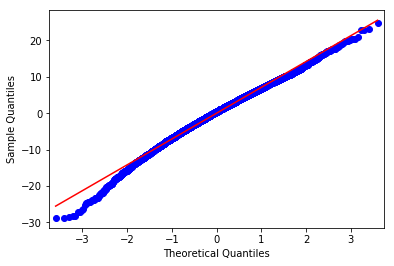

In [7]:
res = my_reg.resid
fig = sm.qqplot(res, line='s')
plt.show()

In [8]:
#Function to identify overfitting
def calc_R2(predicted_y_values, actual_y_values):
    ss_resid = np.sum((predicted_y_values - actual_y_values)**2)
    ss_total = np.sum((actual_y_values - np.mean(actual_y_values))**2)
    return round(1 - ss_resid/ss_total, 4)

In [37]:
y_train_predicted = my_reg.predict(X_train)

y_test_predicted = my_reg.predict(X_test)

In [10]:
print('R-squared on train:', calc_R2(y_train_predicted, y_train))

print('R-squared on test:', calc_R2(y_test_predicted, y_test))

R-squared on train: 0.7993
R-squared on test: 0.5308


R-squared on test: 0.5569


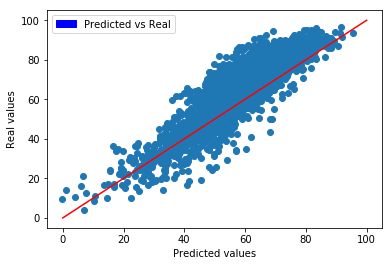

In [42]:
#Plotting the y_predicted versus y_real

import matplotlib.patches as mpatches
plt.scatter(y_test_predicted, y_test)
plt.plot([0,10,20,40,60,80,100],[0,10,20,40,60,80,100], color='r')
election2008 = mpatches.Patch(color='b', label='Predicted vs Real')
plt.text(60,.025,print('R-squared on test:', calc_R2(y_test_predicted, y_test)))
plt.legend(handles=[election2008])
plt.xlabel('Predicted values')
plt.ylabel('Real values')

plt.legend;

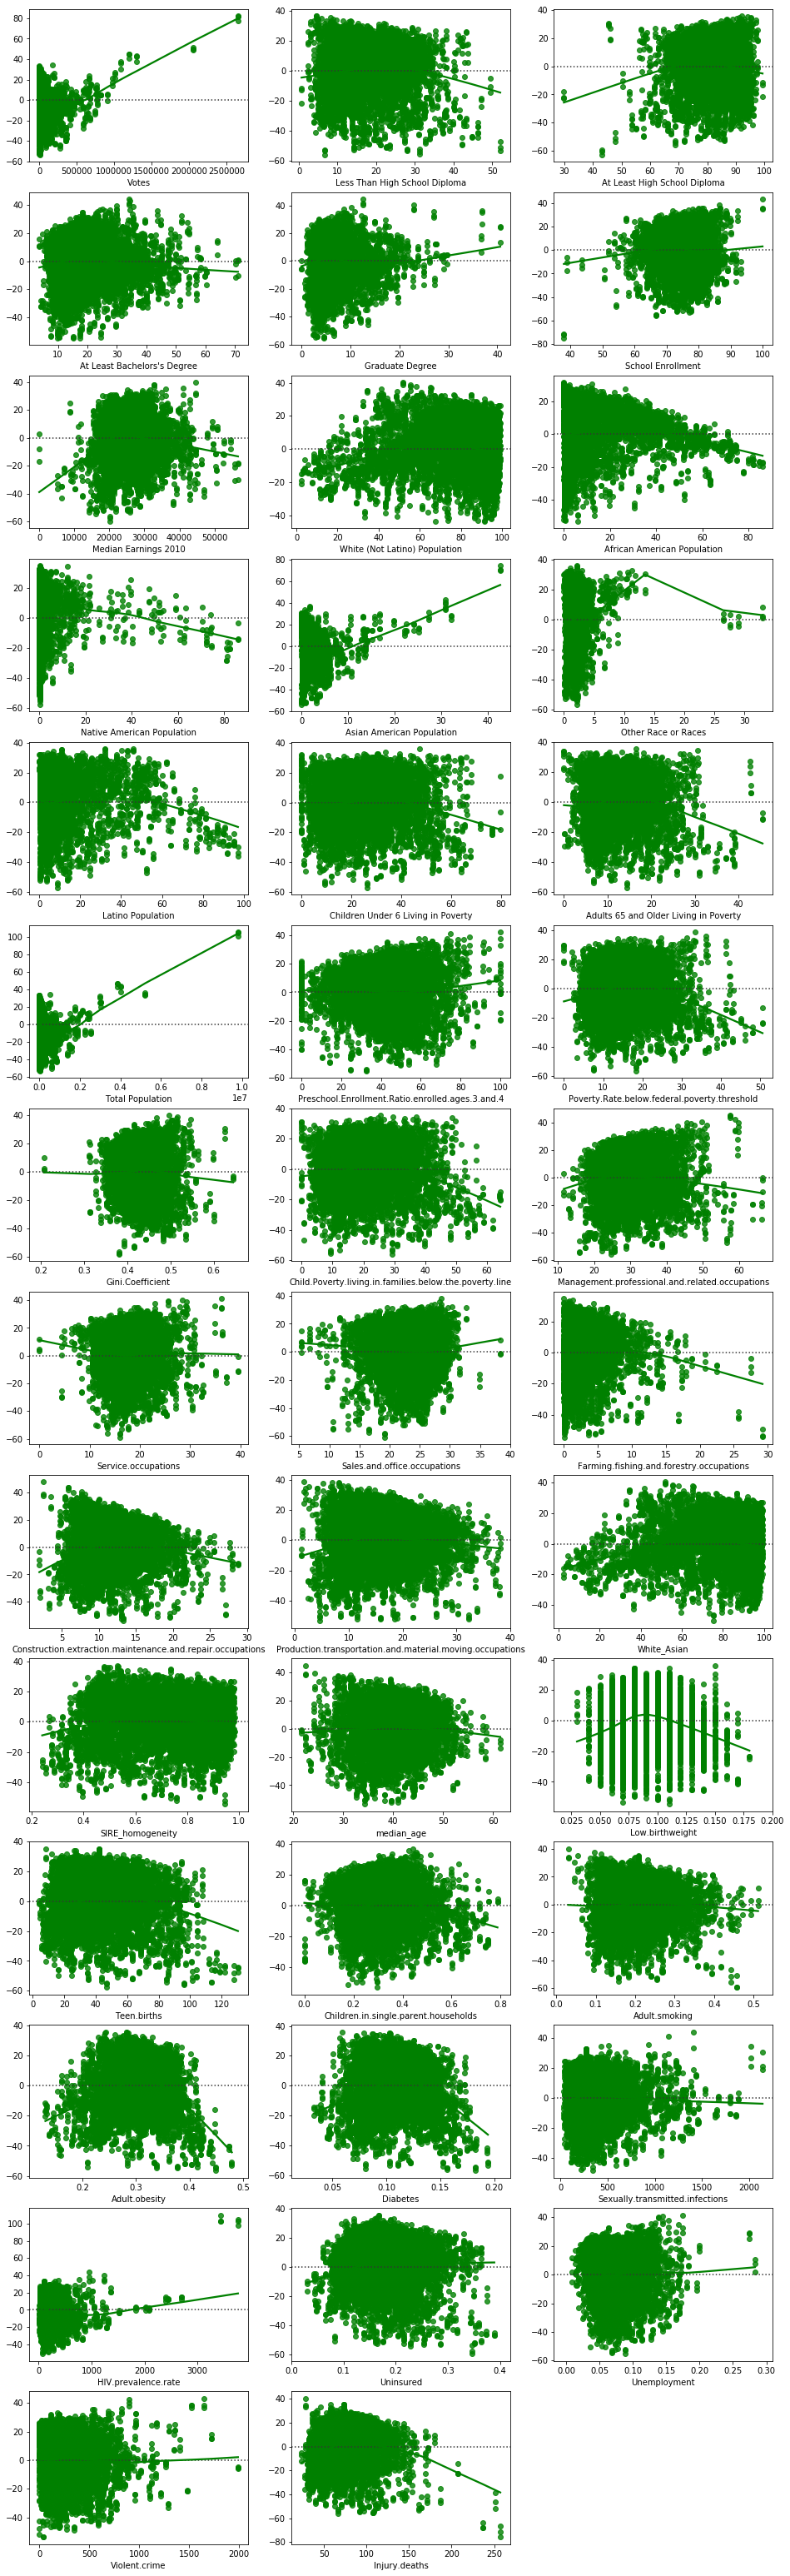

In [12]:
#Residual plots to verify for outliers

columns=list(X.columns)
columns=columns[0:41]
plt.figure(figsize=(16,56))
for column in columns:
    
    plt.subplot(14, 3, columns.index(column)+1)
    sns.residplot(X[column], y, lowess=True, color="g")

plt.show();

_____

###  2. Logistics regression for 2008
Fit a logistic regression model using the same demographic data to predict which political party will take the majority of a county’s votes. (Please use the statsmodels package to create your logistic regression model here, not scikit-learn.) When building your model, answer the following questions: 

**Approach:**
    
   - To allow a logistic regression to be executed, Y values (Republicans 08 pct)  got changed into binaries. Those equal or lower than 50% received an output result of 0, vote shares higher than 50%, an output result of 1.
    - As the X variables, we used the columns in the data.csv, besides the following columns:
        - ST, County, Fips, Precincts.
        - Dummy variables were created for **State** to avoid discarding them.
    - After that we ran the logistics regression model, which crashed. Probably due to multicollinearity.
    - To avoid that, we mannualy tested and removed the columns causing the issue.
    - We executed the logistic fuction, calling a summary for the outputs.
    - To determine the accuracy of the model we calculated the number of correct predictions out of the real results.
    - Finally, a confusion matrix was prepared to provide a visual idea of the results.



**Results:**

- **a) How good is the fit of your model?**
    
    Regarding the main statistics normally used to evaluate the fit of model, we could say:
    1. **Pseudo R-square:** 0.55, not a good result. We would expect something close to 0.9 to consider it robust.
    2. **Accuracy Score:** 88.36%, meaning that the model predicted right 88.36% of the time.
    
    We could say the model had a good fit, based on these two metrics
    
    
- **b) What metric is a good measure to evaluate your model here? Interpret your results.**
   
   Besides the above explained metrics, we could also add:
    3. **log likelihood:** -827.61, very low, for this statistic the higher the result, the better.
    4. **log likelihood p-value:** 0.000, very low, in this case, means the results are significant. Meaning we can draw conclusions from the results shown.
    5. **LL-Null:** it is used to compare with the log likelihood, and it shows you if your model has any explanatory power. The value itself won't allow us to draw conclusions but in association with the log likelihood, to generate the p-value.
    6. **LLR-p-value:** Based on the log likelihood and the LL Null and it measures if our model is statistically different than the LL Null. Since our p-value is very low, we can say that the model is statistically robust and therefore can be used to make predictions.




In [13]:
# Creating binaries for vote share results, based on the percentage achieved, for each election year (to be used in Questions 2 and 3)
votes.loc[votes['Republicans 08 pct'] < 50, '08_Binary'] = 0
votes.loc[votes['Republicans 08 pct'] >= 50, '08_Binary'] = 1

votes.loc[votes['Republicans 12 pct'] < 50, '12_Binary'] = 0
votes.loc[votes['Republicans 12 pct'] >= 50, '12_Binary'] = 1

votes.loc[votes['Republicans 16 pct'] < 50, '16_Binary'] = 0
votes.loc[votes['Republicans 16 pct'] >= 50, '16_Binary'] = 1

y_log_2008=votes.loc[:,'08_Binary']

y_log_2012=votes.loc[:,'12_Binary']

y_log_2016=votes.loc[:,'16_Binary']

In [14]:
X=set3
X = pd.get_dummies(X)
#dropping States that were causing error in the final result
X=X.drop([
       'State_Oklahoma', 
       'State_Rhode Island',
       'State_Utah', 
        'State_West Virginia',
       'State_Wyoming'], axis=1)

#The dependent variable
#Binary for Republicans 08 pct 
Y = y_log_2008

X = np.hstack([np.ones([X.shape[0],1]), X])

#Create an logistic regression instance with our data.
logit = sm.Logit(Y, X)

#Fit the model to the data (this returns a seperate object with the parameters)
fitted_model = logit.fit(maxiter=81)


display(fitted_model.summary())

         Current function value: 0.266199
         Iterations: 81


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              08_Binary   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3023
Method:                           MLE   Df Model:                           85
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:                  0.5519
Time:                        14:56:11   Log-Likelihood:                -827.61
converged:                      False   LL-Null:                       -1846.8
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.5426    177.558      0.690      0.490    -225.465     470.550
x1         -8.716e-06   4.42e-06     -1.971      0.049   -1.74e-05   -5.07e-08
x2             0.1383      0.059      2.349      0.019       0.023       0.254
x3             0.1160      0.056      2.064      0.039       0.006       0.226
x4            -0.0121      0.034     -0.355      0.723      -0.079       0.055
x5            -0.3131      0.065     -4.788      0.000      -0.441      -0.185
x6            -0.0044      0.019     -0.234      0.815      -0.041       0.032
x7         -3.668e-05   2.96e-05     -1.238      0.216   -9.48e-05    2.14e-05
x8            -0.1860        nan        nan        nan         nan         nan
x9            -0.9502      1.322     -0.719      0.472      -3.542       1.642
x10           -0.8506      1.323     -0.643      0.520      -3.443       1.742
x11           -0.3450        nan        nan        nan         nan         nan
x12           -0.8054      1.322     -0.609      0.542      -3.396       1.786
x13           -0.9082      1.323     -0.686      0.492      -3.501       1.685
x14           -0.0175      0.015     -1.181      0.238      -0.047       0.012
x15            0.0003      0.025      0.011      0.991      -0.048       0.049
x16         2.173e-06   1.61e-06      1.352      0.177   -9.78e-07    5.32e-06
x17           -0.0093      0.006     -1.564      0.118      -0.021       0.002
x18           -0.1615      0.045     -3.568      0.000      -0.250      -0.073
x19            9.1481      3.088      2.963      0.003       3.096      15.200
x20            0.0958      0.029      3.308      0.001       0.039       0.152
x21           -0.3920      1.263     -0.310      0.756      -2.867       2.083
x22           -0.4876      1.263     -0.386      0.700      -2.964       1.989
x23           -0.4362      1.263     -0.345      0.730      -2.912       2.039
x24           -0.2451      1.263     -0.194      0.846      -2.721       2.231
x25           -0.4329      1.262     -0.343      0.732      -2.907       2.041
x26           -0.4722      1.263     -0.374      0.709      -2.949       2.004
x27           -0.5295        nan        nan        nan         nan         nan
x28           -9.1991      1.518     -6.061      0.000     -12.174      -6.224
x29           -0.0612      0.027     -2.252      0.024      -0.114      -0.008
x30           -6.8532      6.066     -1.130      0.259     -18.743       5.037
x31            0.0375      0.008      4.428      0.000       0.021       0.054
x32           -6.1775      1.369     -4.513      0.000      -8.861      -3.495
x33           -2.3044      1.580     -1.459      0.145      -5.400       0.792
x34           -0.9885      3.211     -0.308      0.758      -7.282       5.305
x35            8.9407      7.292      1.226      0.220      -5.352      23.234
x36           -0.0002      0.001     -0.441      0.659      -0.001       0.001
x37           -0.0008      0.000     -1.936      0.053      -0.002    1.03e-05
x3

In [15]:
#Statsmodel only returns the probability estimate, we need the manually set the threhold.
y_predicted = np.where(fitted_model.predict(X) > 0.5, 1,0)

#The total number the model correctly predicted:
total_correct = np.where(y_predicted == Y, 1,0).sum()

print()
print ("We got:", total_correct, "out of:", len(Y), "correct.")
print()
print("our Accuracy score is: " +str(round(total_correct/len(Y)*100,2)),"%")


We got: 2747 out of: 3109 correct.

our Accuracy score is: 88.36 %


In [16]:
#Creating a confusion matrix to visualize (True Positives, True Negatives, False Positives and False Negatives)

from sklearn.metrics import confusion_matrix

total_correct=np.where(y_predicted == Y, 1,0).sum()
y_actual=y_log_2008

output = ['No', 'Yes']
matrix2008=confusion_matrix(y_actual, y_predicted)

In [17]:
# Plotting the confusion matrix results in a graph
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
   
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d",cmap="YlGnBu")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    

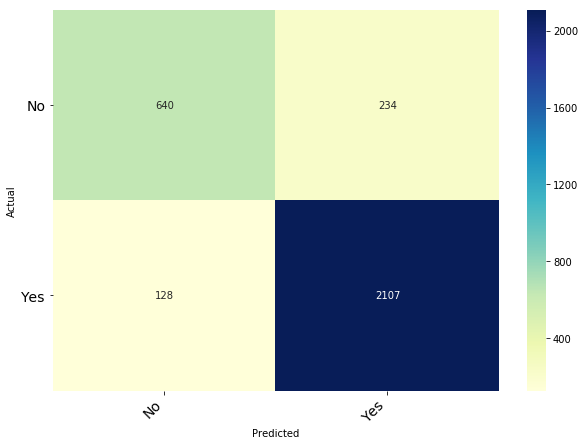

In [18]:
print_confusion_matrix(matrix2008,output, figsize = (10,7), fontsize=14)

____

### 3. Now build new models to predict the 2012 and 2016 relative vote share of the Republican party, respectively. How does each of their performances compare to your 2008 model ?

**Approach:**
- Replicated the analysis done previously at questions 1 and 2, only changing the y-variable for 2012 and 2016, results presented below.


**Results:**

##### 3.1 Linear Regression:

**R-square:**
Among the 3 election years, the best fit to the model came from 2008, with an Adjusted R-square of 0.799.

**R-square (test and train data):**
- 2008: 
R-squared on train: 0.7993
R-squared on test: 0.5308
- 2012:
R-squared on train: 0.7363
R-squared on test: 0.7899
- 2016:
R-squared on train: 0.792
R-squared on test: 0.5569

The best R-square for Train data came from 2012, although it was higher than the train data for that year, which might indicate overfitting and a need for normalization

**Prob(F-test):**
All election years had significant results.

Therefore, we could say that the best linear regression model came from 2008.


##### 3.2 Logistics Regression:

   
- **Comparing with 2008 results:**
    
    1. **Pseudo R-square:** 
        - 2008: 0.552
        - 2012: 0.612
        - 2016: 0.779
    2. **Accuracy Score:** 
        - 2008: 88.36%
        - 2012: 91.25%
        - 2016: 95.92%
    3. **LLR-p-value:**
        - 2008: 0.00
        - 2012: 0.00
        - 2016: 0.00
    
2016 had the strongest R-square and Accuracy scores, reaching similar results for the LLR-p-value. Therefore,  we could say that 2016 had the best fit to the model, compared to either 2008 or 2012.

### Linear regression: 2012 model

In [19]:
# Inverting the sets to leave set2 and y2 as the test set (2012)
X=pd.concat([set3,set2, set1])
y=pd.concat([y3,y2,y1])

# Create dummy variables for our X matrix

X = pd.get_dummies(X)


# Run the train_test_split on our X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, 
                                                    random_state=12, shuffle=False)


# Define our regression, fit our model
my_reg = sm.OLS(y_train, X_train).fit()

# Look at the summary
my_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:56:11   Log-Likelihood:                -21820.
No. Observations:                6218   AIC:                         4.382e+04
Df Residuals:                    6128   BIC:                         4.443e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Votes                                                      -1.795e-05   4.74e-06     -3.786      0.000   -2.72e-05   -8.66e-06
Less Than High School Diploma                                  0.2282      0.076      2.987      0.003       0.078       0.378
At Least High School Diploma                                   0.1853      0.071      2.620      0.009       0.047       0.324
At Least Bachelors's Degree                                   -0.3148      0.053     -5.923      0.000      -0.419      -0.211
Graduate Degree                                               -0.8706      0.095     -9.169      0.000      -1.057      -0.684
School Enrollment                                              0.0485      0.027      1.768      0.077      -0.005       0.102
Median Earnings 2010                                          -0.0001   4.62e-05     -2.688      0.007      -0.000   -3.36e-05
White (Not Latino) Population                                  0.6746      0.717      0.941      0.347      -0.731       2.080
African American Population                                    0.4747      2.147      0.221      0.825      -3.734       4.683
Native American Population                                     0.7512      2.147      0.350      0.726      -3.458       4.961
Asian American Population                                     -0.0566      0.717     -0.079      0.937      -1.462       1.349
Other Race or Races                                           -0.0267      2.151     -0.012      0.990      -4.243       4.190
Latino Population                                              0.6350      2.148      0.296      0.768      -3.575       4.845
Children Under 6 Living in Poverty                             0.0029      0.020      0.141      0.887      -0.037       0.042
Adults 65 and Older Living in Poverty                       6.699e-05      0.036      0.002      0.999      -0.070       0.070
Total Population                                            5.364e-06   1.61e-06      3.327      0.001     2.2e-06    8.52e-06
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0312      0.009     -3.606      0.000      -0.048      -0.014
Poverty.Rate.below.federal.poverty.threshold                  -0.3797      0.073     -5.228      0.000      -0.522      -0.237
Gini.Coefficient                                              11.5043      4.478      2.569      0.010       2.726      20.283
Child.Poverty.living.in.families.below.the.poverty.line        0.1498      0.043      3.521      0.000       0.066       0.233
Management.professional.and.related.occupations                2.0035      2.060      0.972      0.331      -2.035       6.042
Service.occupations                

In [39]:
y_train_predicted = my_reg.predict(X_train)

y_test_predicted = my_reg.predict(X_test)

In [21]:
print('R-squared on train:', calc_R2(y_train_predicted, y_train))

print('R-squared on test:', calc_R2(y_test_predicted, y_test))

R-squared on train: 0.7363
R-squared on test: 0.7899


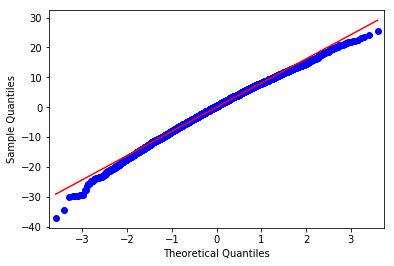

In [22]:
res = my_reg.resid
fig = sm.qqplot(res, line='s')
plt.show()

R-squared on test: 0.5569


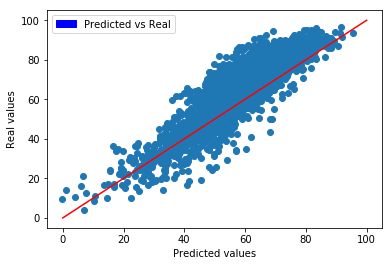

In [40]:
import matplotlib.patches as mpatches
plt.scatter(y_test_predicted, y_test)
plt.plot([0,10,20,40,60,80,100],[0,10,20,40,60,80,100], color='r')

election2008 = mpatches.Patch(color='b', label='Predicted vs Real')
plt.text(60,.025,print('R-squared on test:', calc_R2(y_test_predicted, y_test)))
plt.legend(handles=[election2008])
plt.xlabel('Predicted values')
plt.ylabel('Real values')

plt.legend;

### Linear Regression : 2016 model

In [24]:
# Inverting the sets to leave set2 and y2 as the test set (2016)
X=pd.concat([set3,set1, set2])
y=pd.concat([y3,y1,y2])

# Create dummy variables for our X matrix
X = pd.get_dummies(X)

# Run the train_test_split on our X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, 
                                                    random_state=12, shuffle=False)
# Define our regression, fit our model
my_reg = sm.OLS(y_train, X_train).fit()

# Look at the summary
my_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     262.1
Date:                Sun, 21 Jul 2019   Prob (F-statistic):               0.00
Time:                        14:56:12   Log-Likelihood:                -20616.
No. Observations:                6218   AIC:                         4.141e+04
Df Residuals:                    6128   BIC:                         4.202e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Votes                                                      -1.527e-05   3.91e-06     -3.909      0.000   -2.29e-05   -7.62e-06
Less Than High School Diploma                                  0.2371      0.063      3.767      0.000       0.114       0.361
At Least High School Diploma                                   0.1394      0.058      2.393      0.017       0.025       0.254
At Least Bachelors's Degree                                   -0.1402      0.044     -3.202      0.001      -0.226      -0.054
Graduate Degree                                               -0.8968      0.078    -11.463      0.000      -1.050      -0.743
School Enrollment                                              0.0492      0.023      2.179      0.029       0.005       0.093
Median Earnings 2010                                          -0.0001   3.81e-05     -3.291      0.001      -0.000   -5.06e-05
White (Not Latino) Population                                  0.4178      0.591      0.707      0.479      -0.740       1.576
African American Population                                   -0.2548      1.769     -0.144      0.885      -3.722       3.213
Native American Population                                    -0.0015      1.769     -0.001      0.999      -3.470       3.467
Asian American Population                                     -0.3165      0.591     -0.536      0.592      -1.474       0.841
Other Race or Races                                           -0.9016      1.772     -0.509      0.611      -4.376       2.573
Latino Population                                             -0.1237      1.770     -0.070      0.944      -3.593       3.345
Children Under 6 Living in Poverty                             0.0028      0.017      0.168      0.867      -0.030       0.035
Adults 65 and Older Living in Poverty                         -0.0013      0.029     -0.044      0.965      -0.059       0.056
Total Population                                            4.637e-06   1.33e-06      3.491      0.000    2.03e-06    7.24e-06
Preschool.Enrollment.Ratio.enrolled.ages.3.and.4              -0.0371      0.007     -5.216      0.000      -0.051      -0.023
Poverty.Rate.below.federal.poverty.threshold                  -0.4341      0.060     -7.254      0.000      -0.551      -0.317
Gini.Coefficient                                              13.5942      3.690      3.684      0.000       6.361      20.827
Child.Poverty.living.in.families.below.the.poverty.line        0.1567      0.035      4.470      0.000       0.088       0.225
Management.professional.and.related.occupations                1.5876      1.698      0.935      0.350      -1.740       4.915
Service.occupations                

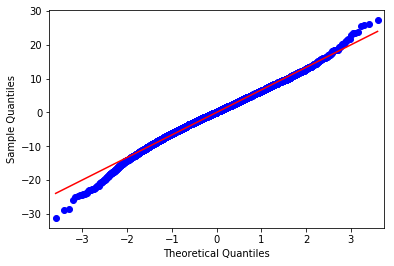

In [25]:
res = my_reg.resid
fig = sm.qqplot(res, line='s')
plt.show()

In [38]:
y_train_predicted = my_reg.predict(X_train)

y_test_predicted = my_reg.predict(X_test)

In [27]:
print('R-squared on train:', calc_R2(y_train_predicted, y_train))

print('R-squared on test:', calc_R2(y_test_predicted, y_test))

R-squared on train: 0.792
R-squared on test: 0.5569


R-squared on test: 0.5569


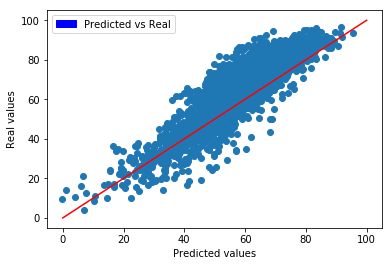

In [41]:
import matplotlib.patches as mpatches
plt.scatter(y_test_predicted, y_test)
plt.plot([0,10,20,40,60,80,100],[0,10,20,40,60,80,100], color='r')
election2008 = mpatches.Patch(color='b', label='Predicted vs Real')
plt.text(60,.025,print('R-squared on test:', calc_R2(y_test_predicted, y_test)))
plt.legend(handles=[election2008])
plt.xlabel('Predicted values')
plt.ylabel('Real values')

plt.legend;

### Logistics regression: 2012

In [29]:
X=set2
X = pd.get_dummies(X)

X=X.drop([
       'State_Oklahoma', 
       'State_Rhode Island',
       'State_Utah', 
        'State_West Virginia',
       'State_Wyoming'], axis=1)

#The dependent variable
#Binary for Republicans 08 pct 
Y = y_log_2012

X = np.hstack([np.ones([X.shape[0],1]), X])

#Create an logistic regression instance with our data.
logit = sm.Logit(Y, X)

#Fit the model to the data (this returns a seperate object with the parameters)
fitted_model = logit.fit(maxiter=81)


display(fitted_model.summary())

         Current function value: 0.205533
         Iterations: 81


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              12_Binary   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3023
Method:                           MLE   Df Model:                           85
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:                  0.6123
Time:                        14:56:13   Log-Likelihood:                -639.00
converged:                      False   LL-Null:                       -1648.2
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -173.7681   1.32e+04     -0.013      0.989    -2.6e+04    2.57e+04
x1         -7.753e-06   4.44e-06     -1.746      0.081   -1.65e-05    9.53e-07
x2            -0.1657    131.827     -0.001      0.999    -258.541     258.210
x3            -0.2134    131.827     -0.002      0.999    -258.589     258.162
x4             0.0070      0.040      0.175      0.861      -0.071       0.085
x5            -0.3156      0.076     -4.131      0.000      -0.465      -0.166
x6             0.0221      0.022      0.990      0.322      -0.022       0.066
x7         -6.389e-05   3.42e-05     -1.867      0.062      -0.000    3.17e-06
x8             0.5371   4.71e+04   1.14e-05      1.000   -9.24e+04    9.24e+04
x9             1.0839      1.545      0.702      0.483      -1.944       4.112
x10            1.2091      1.546      0.782      0.434      -1.821       4.239
x11            0.3332   4.71e+04   7.07e-06      1.000   -9.24e+04    9.24e+04
x12            1.0729      1.542      0.696      0.487      -1.950       4.096
x13            1.1662      1.546      0.754      0.451      -1.864       4.196
x14           -0.0208      0.018     -1.126      0.260      -0.057       0.015
x15            0.0062      0.030      0.205      0.837      -0.053       0.065
x16         2.037e-06   1.61e-06      1.261      0.207   -1.13e-06     5.2e-06
x17           -0.0179      0.007     -2.395      0.017      -0.032      -0.003
x18           -0.1079      0.053     -2.043      0.041      -0.211      -0.004
x19            7.3555      3.823      1.924      0.054      -0.138      14.849
x20            0.0899      0.035      2.557      0.011       0.021       0.159
x21            0.7844      1.506      0.521      0.602      -2.167       3.736
x22            0.6268      1.506      0.416      0.677      -2.326       3.579
x23            0.7677      1.506      0.510      0.610      -2.184       3.719
x24            0.9504      1.506      0.631      0.528      -2.001       3.902
x25            0.8294      1.504      0.551      0.581      -2.119       3.778
x26            0.6592      1.506      0.438      0.662      -2.293       3.611
x27            0.8731   4.71e+04   1.85e-05      1.000   -9.24e+04    9.24e+04
x28          -12.3103      1.902     -6.474      0.000     -16.037      -8.583
x29           -0.0405      0.033     -1.231      0.218      -0.105       0.024
x30            3.6696      7.331      0.501      0.617     -10.699      18.038
x31            0.0473      0.010      4.555      0.000       0.027       0.068
x32           -7.9438      1.728     -4.596      0.000     -11.331      -4.556
x33           -4.0201      1.918     -2.096      0.036      -7.779      -0.261
x34            5.8127      3.886      1.496      0.135      -1.804      13.429
x35           11.5537      9.072      1.274      0.203      -6.227      29.335
x36           -0.0001      0.001     -0.195      0.845      -0.001       0.001
x37           -0.0010      0.000     -2.045      0.041      -0.002   -4.04e-05
x3

In [30]:
#Statsmodel only returns the probability estimate, we need the manually set the threhold.
y_predicted = np.where(fitted_model.predict(X) > 0.5, 1,0)

#The total number the model correctly predicted:
total_correct = np.where(y_predicted == Y, 1,0).sum()

print()
print ("We got:", total_correct, "out of:", len(Y), "correct.")
print()
print("our Accuracy score is: " +str(round(total_correct/len(Y)*100,2)),"%")


We got: 2837 out of: 3109 correct.

our Accuracy score is: 91.25 %


In [31]:

total_correct=np.where(y_predicted == Y, 1,0).sum()
y_actual=y_log_2008

output = ['No', 'Yes']
matrix2012=confusion_matrix(y_actual, y_predicted)

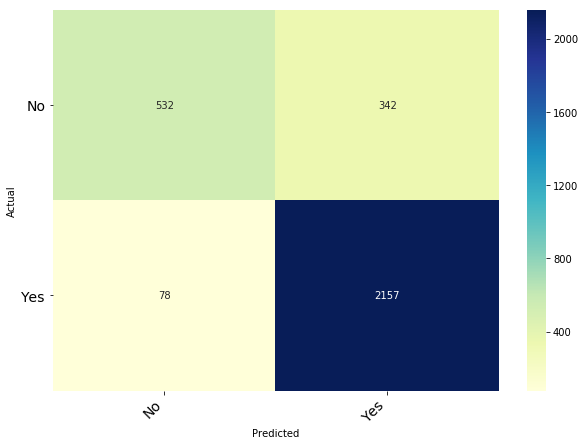

In [32]:
print_confusion_matrix(matrix2012,output, figsize = (10,7), fontsize=14)

### Logistic Regression: 2016

In [33]:
X=set1
X = pd.get_dummies(X)

X=X.drop([
       'State_Oklahoma', 
       'State_Rhode Island',
       'State_Utah', 
        'State_West Virginia',
       'State_Wyoming'], axis=1)

#The dependent variable
#Binary for Republicans 16 pct 
Y = y_log_2016

X = np.hstack([np.ones([X.shape[0],1]), X])

#Create an logistic regression instance with our data.
logit = sm.Logit(Y, X)

#Fit the model to the data (this returns a seperate object with the parameters)
fitted_model = logit.fit(maxiter=81)


display(fitted_model.summary())

         Current function value: 0.095734
         Iterations: 81


C:\Users\User\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              16_Binary   No. Observations:                 3109
Model:                          Logit   Df Residuals:                     3023
Method:                           MLE   Df Model:                           85
Date:                Sun, 21 Jul 2019   Pseudo R-squ.:                  0.7792
Time:                        14:56:13   Log-Likelihood:                -297.64
converged:                      False   LL-Null:                       -1347.8
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.9922    289.125     -0.149      0.882    -609.668     523.683
x1         -1.495e-05   5.65e-06     -2.644      0.008    -2.6e-05   -3.87e-06
x2             0.3449      0.136      2.539      0.011       0.079       0.611
x3             0.3118      0.132      2.357      0.018       0.053       0.571
x4            -0.1073      0.058     -1.836      0.066      -0.222       0.007
x5            -0.4524      0.109     -4.162      0.000      -0.666      -0.239
x6             0.0181      0.033      0.542      0.588      -0.047       0.084
x7         -7.062e-05   5.05e-05     -1.397      0.162      -0.000    2.84e-05
x8             2.0419        nan        nan        nan         nan         nan
x9             5.2231      0.876      5.962      0.000       3.506       6.940
x10            5.4420      0.874      6.225      0.000       3.729       7.156
x11            1.6006        nan        nan        nan         nan         nan
x12            4.9751      0.885      5.622      0.000       3.241       6.710
x13            5.3755      0.876      6.135      0.000       3.658       7.093
x14           -0.0066      0.030     -0.223      0.824      -0.065       0.051
x15            0.0057      0.043      0.131      0.896      -0.079       0.091
x16         4.363e-06   2.06e-06      2.115      0.034    3.21e-07     8.4e-06
x17           -0.0079      0.011     -0.695      0.487      -0.030       0.014
x18           -0.1068      0.073     -1.457      0.145      -0.250       0.037
x19           11.1630      5.846      1.910      0.056      -0.295      22.621
x20            0.1092      0.056      1.955      0.051      -0.000       0.219
x21           -5.1326      2.134     -2.406      0.016      -9.314      -0.951
x22           -5.4469      2.130     -2.557      0.011      -9.622      -1.271
x23           -5.2784      2.131     -2.477      0.013      -9.454      -1.102
x24           -4.9973      2.131     -2.345      0.019      -9.175      -0.820
x25           -5.1953      2.128     -2.441      0.015      -9.367      -1.024
x26           -5.3176      2.131     -2.496      0.013      -9.494      -1.141
x27            3.6419        nan        nan        nan         nan         nan
x28          -20.3020      2.766     -7.340      0.000     -25.723     -14.881
x29           -0.0143      0.051     -0.283      0.778      -0.114       0.085
x30            5.5372     11.217      0.494      0.622     -16.448      27.523
x31            0.0290      0.015      1.879      0.060      -0.001       0.059
x32           -8.7968      2.548     -3.453      0.001     -13.790      -3.804
x33           -1.1816      3.282     -0.360      0.719      -7.614       5.251
x34            6.3811      6.059      1.053      0.292      -5.495      18.257
x35           37.3402     14.720      2.537      0.011       8.489      66.191
x36            0.0003      0.001      0.300      0.765      -0.001       0.002
x37           -0.0012      0.001     -1.495      0.135      -0.003       0.000
x3

In [34]:
#Statsmodel only returns the probability estimate, we need the manually set the threhold.
y_predicted = np.where(fitted_model.predict(X) > 0.5, 1,0)

#The total number the model correctly predicted:
total_correct = np.where(y_predicted == Y, 1,0).sum()

print()
print ("We got:", total_correct, "out of:", len(Y), "correct.")
print()
print("our Accuracy score is: " +str(round(total_correct/len(Y)*100,2)),"%")


We got: 2982 out of: 3109 correct.

our Accuracy score is: 95.92 %


In [35]:
total_correct=np.where(y_predicted == Y, 1,0).sum()
y_actual=y_log_2016

output = ['No', 'Yes']
matrix2016=confusion_matrix(y_actual, y_predicted)

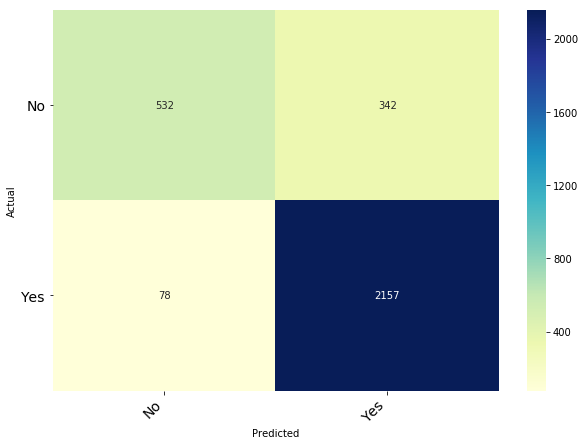

In [36]:
print_confusion_matrix(matrix2012,output, figsize = (10,7), fontsize=14)